<a href="https://colab.research.google.com/github/Rishapriakanth/Machine-learning-analysis/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data = {'CGPA':['g9','l9','g9','l9','g9','g9'], 'Inter':['Y','N','N','N','Y','Y'], 'PK':['++','++','==','==','++','++'], 'CS':['G','M','M','G','M','M'], 'Job':['Y','Y','N','N','Y','Y']}
table=pandas.DataFrame(data,columns=["CGPA","Inter","PK","CS","Job"])
table.where(table["CGPA"]=="g9").count()
encoder=LabelEncoder()
for i in table:
  table[i]=encoder.fit_transform(table[i])
X=table.iloc[:,0:4].values
y=table.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=4)
model.fit(X_train,y_train)
print([1,1,0,1])
if model.predict([[1,1,0,1]])==1:
  print("Got JOB")
else:
  print("Didn't get JOB")
print([0,0,1,0])
if model.predict([[0,0,1,0]])==1:
  print("Got JOB")
else:
  print("Didn't get JOB")


[1, 1, 0, 1]
Got JOB
[0, 0, 1, 0]
Didn't get JOB


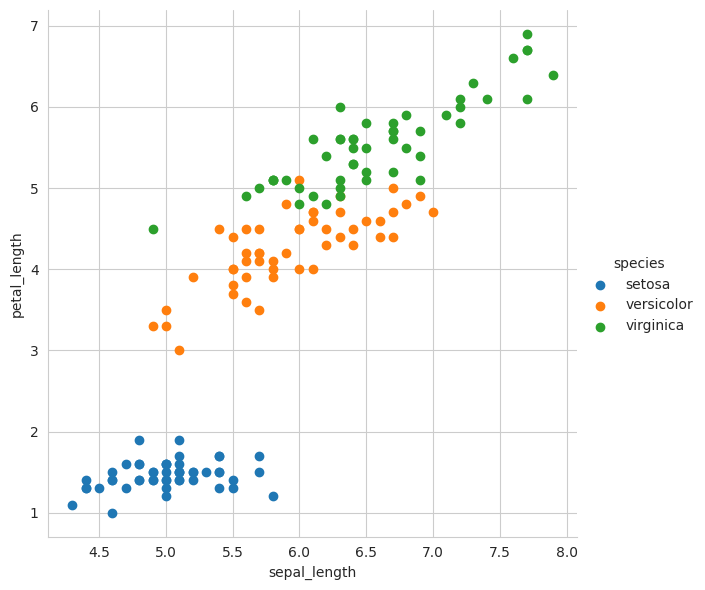

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
y_test = ['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-set

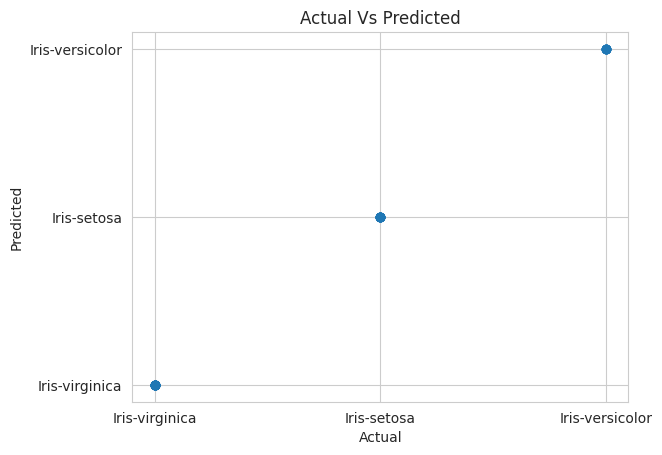


Accuracy Of AdaBoost For The Given Dataset :  1.0


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split,cross_validate,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",height = 6).map(plt.scatter,'sepal_length','petal_length').add_legend()
plt.show()
iris = pd.read_csv("/content/Iris.csv")
print (iris.head(10))
iris = iris.drop('Id',axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)
print("y_test =", y_test)
print("y_pred =", y_pred)
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test,y_pred)
plt.show()
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)

(30, 2)
Top five Records


           x          y  label
0  14.321364  17.399607      1
1  15.931998  17.485568      0
2  14.413736  15.236092      1
3  15.679722  15.605181      1
4  15.801203  16.297798      0
5  15.643082  17.530056      0
6  17.020914  18.621252      0
7  15.516829  14.268200      1
8  15.132167  15.835734      1
9  16.982214  16.946735      0


<ipython-input-12-baeafbd79c66>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],c=c, cmap=plt.cm.Paired,s=20, edgecolor='k',label="Class %s" % n)


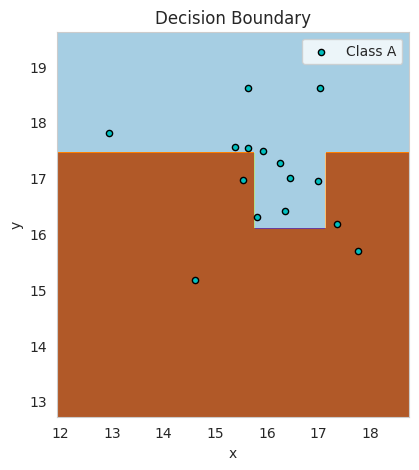

In [12]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_blobs(n_samples = 30, centers=2, n_features=2, center_box = (10, 20),random_state=0)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(X.shape)
print("Top five Records\n\n")
df_top = df.head(10)
print(df_top)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.40,random_state=0)
model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=10)
model.fit(X_train,y_train)
plot_colors = "c"
plot_step = 0.02
class_names = "AB"
plt.figure(figsize=(10, 5))
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],c=c, cmap=plt.cm.Paired,s=20, edgecolor='k',label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()
